<a href="https://colab.research.google.com/github/nurimammasri/Marketing-Campaign-Model-Prediction-by-Datalicious/blob/main/Response%20Prediction%20Classification%20Marketing%20Campaign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **✨ Investigate Hotel Business using Data Visualization ✨**

## **📍 Table of Content 📍**
- Business Understanding
    - Problem Statement
    - Goals
    - Objectives
    - Business Metrics
- Data Preparation
    - Data Description
    - Libraries & Datasets
- Data Understanding
    - Exploring Datasets
    - Data Types Information
    - Statistical Summary
    - EDA (Exploratory Data Analysis)

## **⚙ Work Environment ⚙**

- **Tools**

[![Made withJupyter](https://img.shields.io/badge/Made%20with-Jupyter-orange?style=for-the-badge&logo=Jupyter)](https://jupyter.org/try)

[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/nurimammasri/Marketing-Campaign-Model-Prediction-by-Datalicious/blob/main/Response%20Prediction%20Classification%20Marketing%20Campaign.ipynb)

- **Programming Language**

[![forthebadge made-with-python](http://ForTheBadge.com/images/badges/made-with-python.svg)](https://www.python.org/)

[![made-with-python](https://img.shields.io/badge/Made%20with-Python-1f425f.svg)](https://www.python.org/)

- **Git and Github**

Repository : [Marketing Campaign Model Prediction by Datalicious](https://github.com/nurimammasri/Marketing-Campaign-Model-Prediction-by-Datalicious.git)

- **Libraries**

[Requirements Text](https://github.com/nurimammasri/Marketing-Campaign-Model-Prediction-by-Datalicious/blob/main/requirements.txt)

- **Dataset**

[Marketing campaign](https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign "Marketing campaign dataset from Kaggle")

## **⛳ Business Understanding ⛳**

### **📌 Problem Statement**

Business performance management is a metric for determining overall business progress toward goals. Business performance related to sales/marketing effectiveness. This performance is determined by the company's ability to set a strategy in order to be able to sell products/services that can meet customer expectations.

In the hospitality business, of course, it is closely related to the customer. The more customers who order, the more income the company. Therefore, analyzing the behavior of customers in booking hotels is very important. In addition to analyzing customer behavior in booking hotels, to measure the success of a hotel business, we can see the level of order cancellations. If many customers cancel their orders, this will adversely affect the hotel's business performance.

The purpose of this project is analyzing customer behaviors in hotel business. Provide insights related to hotel business performance. This insight can be obtained by exploring data, such as analyzing how customers behave in ordering hotel tickets or looking for factors that influence the cancellation of hotel ticket bookings. Then present the insights obtained using visualization and data storytelling.

### **📌 Goals**

The company wants to improve business performance by analyzing how customers behave in ordering hotel tickets or looking for factors that influence the cancellation of hotel ticket bookings

### **📌 Objectives**

Making reporting insights obtained to provide insight related to hotel business performance by using visualization and data storytelling.

# **💉 Import Libraries 💉**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from datetime import datetime

from scipy.stats import skew
from scipy.stats import kurtosis

# Ignores any warning
import warnings 
warnings.filterwarnings("ignore")

sns.set(rc={'figure.figsize':(15, 8)})
sns.set_style("whitegrid")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = lambda x : '{:.0f}'.format(x) if round(x,0) == x else '{:.3f}'.format(x)

# from matplotlib import rcParams
# rcParams['figure.figsize'] = 12, 4
# rcParams['lines.linewidth'] = 3
# rcParams['xtick.labelsize'] = 'x-large'
# rcParams['ytick.labelsize'] = 'x-large'

import matplotlib as mp
%matplotlib inline
import textwrap
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec
from matplotlib.colors import LinearSegmentedColormap

# **💡 Data Understanding 💡**

## **📚 Import Dataset 📚**

In [2]:
# missing_values = ['n/a', 'na', 'nan', '-', '--', 'null', 'Null', ' ', '-1', -1]
# source = 'https://raw.githubusercontent.com/nurimammasri/Investigate-Hotel-Business-using-Data-Visualization/main/Dataset/hotel_bookings_data.csv'
source = 'Dataset/hotel_bookings_data.csv'
# df = pd.read_csv(source, na_values = missing_values)
df = pd.read_csv(source)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,NaN,NaN,0,Personal,0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,NaN,NaN,0,Personal,0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,NaN,NaN,0,Personal,75,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304,NaN,0,Personal,75,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240,NaN,0,Personal,98,0,1,Check-Out


## **🕹 Data Description 🕹**

```
🚨✨ This project is from Mini Project Data Science Bootcamp Rakamin Academy Batch 32 ✨🚨
📌 Data provide by Rakamin - hotel_bookings data.csv 📌 
```

**Hotel Bookings Dataset ([link datasets](https://github.com/nurimammasri/Investigate-Hotel-Business-using-Data-Visualization/blob/main/Dataset/hotel_bookings_data.csv))**

**Dataset Description:**

This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things.

All personally identifying information has been removed from the data.

This dataset contains `119,390 samples`. Contains `29 features` :

- `hotel` - Hotel (H1 = Resort Hotel or H2 = City Hotel)
    
    - `City Hotel` is a type of hotel located in urban centers and is typically found in large cities.

    - `Resort Hotel` is an accommodation type usually built on the coastline or at the foot of mountain hills, offering scenic natural views.

- `is_canceled` - Value indicating if the booking was canceled (1) or not (0)

- `lead_time` - Number of days that elapsed between the entering date of the booking into the PMS (Property Management System) and the arrival date

- `arrival_date_year` - Year of arrival date

- `arrival_date_month`- Month of arrival date

- `arrival_date_week_number` - Week number of year for arrival date

- `arrival_date_day_of_month` - Day of arrival date

- `stays_in_weekend_nights` - Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

- `stays_in_weekdays_nights` - Number of weekdays nights (Monday to Friday) the guest stayed or booked to stay at the hotel

- `adults` - Number of adults

- `children` - Number of children

- `babies` - Number of babies

- `meal` - Type of meal booked. Categories are presented in standard hospitality meal packages: 
    - Undefined/SC – no meal package
    - BB – Bed & Breakfast
    - HB – Half board (breakfast and one other meal – usually dinner) 
    - FB – Full board (breakfast, lunch and dinner)

- `city` - City name

- `market_segment` - Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”

- `distribution_channel` - Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

- `is_repeated_guest` - Value indicating if the booking name was from a repeated guest (1) or not (0)

- `previous_cancellations` - Number of previous bookings that were cancelled by the customer prior to the current booking

- `previous_bookings_not_canceled` - Number of previous bookings not cancelled by the customer prior to the current booking

- `booking_changes` - Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation

- `deposit_type` - Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: 
    - No Deposit – no deposit was made
    - Non Refund – a deposit was made in the value of the total stay cost
    - Refundable – a deposit was made with a value under the total cost of stay

    Note : The deposit is a security deposit that will be paid back to you as a customer. However, on condition that none of the facilities you enjoy are damaged and do not use other paid hotel facilities, then the deposit money will be returned 100% to you after no damage to this hotel's facilities.

- `agent` - ID of the travel agency that made the booking

- `company` - ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons

- `days_in_waiting_list` - Number of days the booking was in the waiting list before it was confirmed to the customer

- `customer_type` - Type of booking, assuming one of four categories: 
    - Contract - when the booking has an allotment or other type of contract associated to it; 
    - Group – when the booking is associated to a group; 
    - Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; 
    - Transient-party – when the booking is transient, but is associated to at least other transient booking

- `adr`- Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

- `required_car_parking_spaces` - Number of car parking spaces required by the customer

- `total_of_special_requests` - Number of special requests made by the customer (e.g. twin bed or high floor)

- `reservation_status` - Reservation last status, assuming one of three categories: 
    - Canceled – booking was canceled by the customer; 
    - Check-Out – customer has checked in but already departed; 
    - No-Show – customer did not check-in and did inform the hotel of the reason why

Resources : https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand

## **☕ Basic Datasets Information ☕**

In [3]:
print("Shape of data :", df.shape)
print("Number of rows :", df.shape[0])
print("Number of columns :", df.shape[1])

Shape of data : (119390, 29)
Number of rows : 119390
Number of columns : 29


In [4]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_weekdays_nights', 'adults', 'children', 'babies', 'meal',
       'city', 'market_segment', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'deposit_type', 'agent', 'company',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status'],
      dtype='object')

In [5]:
# get the info of each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

**Observations:**

- The dataset consists of `29 columns` and `119,390 rows` of data.
- There are 3 types of data: `int64, object, float64`.
- There are some missing values in the following columns:
    - `company` with a total of `94%` null values, amounting to `112,593 rows`.
    - `agent` with a total of `13%` null values, amounting to `16,340 rows`.
    - `city` with a total of `0.4%` null values, amounting to `488 rows`.
    - `children` with a total of `0.003%` null values, amounting to `4 rows`.

# **🏝 Data Cleansing/Preprocessing 🏝**

## **📌 Handling Duplicate Rows**

In [6]:
df[df.duplicated(keep=False)].sort_values(by=list(df.columns.values)).head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
78101,City Hotel,0,0,2017,December,40,2,0,2,1,0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,2,No Deposit,NaN,NaN,0,Family,145,0,0,Check-Out
78104,City Hotel,0,0,2017,December,40,2,0,2,1,0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,2,No Deposit,NaN,NaN,0,Family,145,0,0,Check-Out
78105,City Hotel,0,0,2017,December,40,2,0,2,1,0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,2,No Deposit,NaN,NaN,0,Family,145,0,0,Check-Out
78403,City Hotel,0,0,2017,December,41,6,0,3,1,0,0,Breakfast,Kabupaten Blora,Direct,Direct,0,0,0,0,No Deposit,NaN,NaN,0,Personal,130,0,0,Check-Out
78407,City Hotel,0,0,2017,December,41,6,0,3,1,0,0,Breakfast,Kabupaten Blora,Direct,Direct,0,0,0,0,No Deposit,NaN,NaN,0,Personal,130,0,0,Check-Out
78385,City Hotel,0,0,2017,December,41,7,0,2,1,0,0,Breakfast,Kota Denpasar,Groups,TA/TO,0,0,0,0,No Deposit,1,NaN,0,Family,119,0,0,Check-Out
78401,City Hotel,0,0,2017,December,41,7,0,2,1,0,0,Breakfast,Kota Denpasar,Groups,TA/TO,0,0,0,0,No Deposit,1,NaN,0,Family,119,0,0,Check-Out
78404,City Hotel,0,0,2017,December,41,7,0,2,1,0,0,Breakfast,Kota Denpasar,Groups,TA/TO,0,0,0,0,No Deposit,1,NaN,0,Family,119,0,0,Check-Out
78402,City Hotel,0,0,2017,December,41,7,0,2,2,0,0,Breakfast,Kota Denpasar,Groups,TA/TO,0,0,0,0,No Deposit,1,NaN,0,Family,138,0,0,Check-Out
78405,City Hotel,0,0,2017,December,41,7,0,2,2,0,0,Breakfast,Kota Denpasar,Groups,TA/TO,0,0,0,0,No Deposit,1,NaN,0,Family,138,0,0,Check-Out


In [7]:
print("Number of duplicate rows :", df.duplicated().sum())

Number of duplicate rows : 33261


In [8]:
# print(f"Data Frame Dimension Before Duplicate Removal: {df.shape}")
# df = df.drop_duplicates().reset_index(drop=True)
# print(f"Data Frame Dimension After Duplicate Removal: {df.shape}")

**Observations:** 

- This dataset has many duplicates, totaling 33,261 rows.
- Before handling duplicate rows, the dataset had 119,390 rows.
- After handling duplicate rows, the dataset is left with 86,129 rows.

⛳ However, in this process, we will not drop the duplicate rows, assuming that it is due to the absence of customer IDs in the data, and it could be a coincidence that the booking criteria are the same for several customers. Thus, we assume that the data is not duplicate.

## **📌 Handling Missing Value**

Performing a check for the number of Missing Values and their Percentage.

In [9]:
# The number of NULL entries in each column.
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               4
babies                                 0
meal                                   0
city                                 488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

In [10]:
print('Missing values status:', df.isnull().values.any())
nvc = pd.DataFrame(df.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = (nvc['Total Null Values']/df.shape[0])*100
nvc["Data Type"] = [df[col].dtype for col in df.columns]
nvc.sort_values(by=["Total Null Values", "Percentage"], ascending=False, inplace=True)
print(nvc)

Missing values status: True
                                Total Null Values  Percentage Data Type
company                                    112593      94.307    object
agent                                       16340      13.686     int64
city                                          488       0.409     int64
children                                        4       0.003   float64
hotel                                           0           0    object
required_car_parking_spaces                     0           0     int64
adr                                             0           0     int64
customer_type                                   0           0     int64
days_in_waiting_list                            0           0    object
deposit_type                                    0           0     int64
booking_changes                                 0           0     int64
previous_bookings_not_canceled                  0           0     int64
previous_cancellations              

In [11]:
missing_values = ['n/a', 'na', 'nan', '-', '--', 'null', 'Null', '', ' ', '-1', -1]
for i in df.columns:
    dmmy_col = df[i].apply(lambda x : str(x).strip())
    isnan = dmmy_col.isin(missing_values).any()
    miss = np.unique(dmmy_col[dmmy_col.isin(missing_values)].values)
    if isnan :
        print("{} = {} - {}".format(i, isnan, miss))

children = True - ['nan']
city = True - ['nan']
agent = True - ['nan']
company = True - ['nan']


<Figure size 1000x600 with 0 Axes>

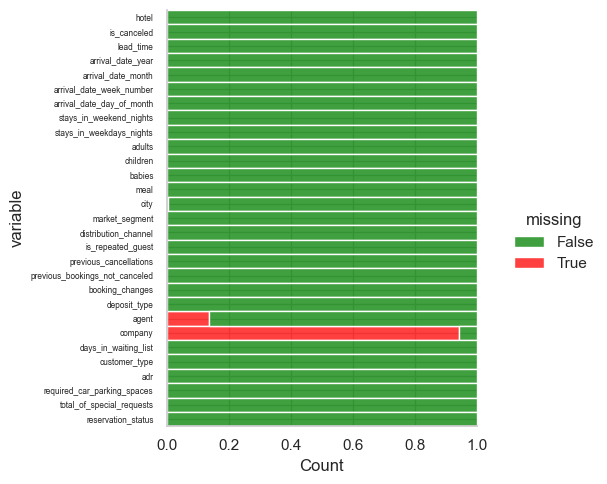

In [12]:
plt.figure(figsize=(10,6))

dms = sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25,
    palette = ["green","red"]
)

dms.set_yticklabels(size = 6)

In [13]:
# Filling zero value in the company because no company is involved
df['company'] = df['company'].fillna(0)
# Filling zero value in the agent because no agent is involved
df['agent'] = df['agent'].fillna(0)
# Filling zero rating on children is probably because the customer has no children
df['children'] = df['children'].fillna(0)
# Filling 'unknown' for unavailable city
df['city'] = df['city'].fillna('unknown')

**Observations:**

- There are several missing values in the columns:
    - `company` with a total of 94% null values, amounting to `112,593 rows`.
    
        Filling zero values in the company column since no company is involved.
        
    - `agent` with a total of 13% null values, amounting to `16,340 rows`.
    
        Filling zero values in the agent column since no agent is involved.
        
    - `city` with a total of 0.4% null values, amounting to `488 rows`.
    
        Filling 'unknown' for unavailable city entries.
        
    - `children` with a total of 0.003% null values, amounting to `4 rows`.
    
        Filling zero values for children, as it is likely that the customers have no children.

In [14]:
# number of NULL entries after cleaning
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

## **📌 Data Types Information**

In [15]:
print('Data type before correction:\n')
df.info()

Data type before correction:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null 

**Change the Some column data type**

We change the data type of `float64` which had null before, `children`, `agent`, and `company` to `int64`

In [16]:
df['children'] = df['children'].astype('int64')
df['agent'] = df['agent'].astype('int64')
df['company'] = df['company'].astype('int64')

In [17]:
print('Data type after correction:\n')
df.info()

Data type after correction:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  int64  
 11  babies                          119390 non-null  

## **📌 Handling Invalid Values**

Check for the unique values in the data.

In [18]:
for x in df.columns : 
    unq = list(df[x].unique())
    unq.sort()
    
    print (f'===== {x} =====')
    if len(unq) >= 13:
        prt = list(unq[:12])+['.....']
        print (f'{prt}')
    else:
        print (f'{unq}')
    print()

===== hotel =====
['City Hotel', 'Resort Hotel']

===== is_canceled =====
[0, 1]

===== lead_time =====
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, '.....']

===== arrival_date_year =====
[2017, 2018, 2019]

===== arrival_date_month =====
['April', 'August', 'December', 'February', 'January', 'July', 'June', 'March', 'May', 'November', 'October', 'September']

===== arrival_date_week_number =====
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, '.....']

===== arrival_date_day_of_month =====
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, '.....']

===== stays_in_weekend_nights =====
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, '.....']

===== stays_in_weekdays_nights =====
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, '.....']

===== adults =====
[0, 1, 2, 3, 4, 5, 6, 10, 20, 26, 27, 40, '.....']

===== children =====
[0, 1, 2, 3, 10]

===== babies =====
[0, 1, 2, 9, 10]

===== meal =====
['Breakfast', 'Dinner', 'Full Board', 'No Meal', 'Undefined']

===== city =====
['Kabupaten Aceh Jaya', 'Kabupaten Bandung', 'Kabupa

In [19]:
df["meal"].value_counts()

Breakfast     92310
Dinner        14463
No Meal       10650
Undefined      1169
Full Board      798
Name: meal, dtype: int64

**Replacing incorrect values in `meal` column**

There are several values in the 'meal' feature that do not match any defined categories. These values will be replaced with 'No Meal' since it is assumed that 'Undefined' indicates customers who did not order any meals, be it for Breakfast, Dinner, or Full Board (Breakfast + Dinner). This replacement will ensure clarity and consistency in the data. Data will be replaced to unify entries with the same meaning, reducing redundancy in the data.

- Changing `Undefined` to `No Meal`

In [20]:
# Replacing the category 'Undefined' with 'No Meal'.
df['meal'] = df['meal'].replace(['Undefined'],'No Meal')

In [21]:
df['meal'].unique()

array(['Breakfast', 'Full Board', 'Dinner', 'No Meal'], dtype=object)

## **📌 Drop Unnecessary Data**

It can be seen that the data in the hotel is strongly influenced by the customer's condition. So we need to ensure the total number of guests/customers on each order

- Number of Customers / Guests
- Total duration of the night

So, we will filter some things, namely:

- Total Guest (Number of Customers / Guests) <= 0, or there are no guests at all.
- Total duration of the night <= 0, or not available in the data for the duration of the stay.
- If there is a single data entry for adr (Average Daily Rate), it might be due to a data calculation error. Since there is only one row, it will be dropped to avoid errors in the analysis.

In [22]:
print("======= Before Drop Unnecessary Data =======")
print("Total Data = {} rows".format(df.shape[0]))

# Number of Customers / Guests (adults/children/babies)
df['total_guests'] = df['adults'] + df['children'] + df['babies']
print('No Customers / Guest = {} rows'.format(df[df['total_guests'] <= 0].shape[0]))

# Total duration of the night (weekend/weekdays)
df['stay_duration'] = df['stays_in_weekend_nights'] + df['stays_in_weekdays_nights']
print('No Duration of Stay = {} rows'.format(df[df['stay_duration'] <= 0].shape[0]))

# Negative values in ADR (Average Daily Rate)
print('Negative values in ADR (Average Daily Rate) = {} rows'.format(df[df['adr'] < 0].shape[0]))

print("======= After Drop Unnecessary Data =======")

# Filter the data according to the requirements 
df_final = df[(df['total_guests'] > 0) & 
              (df['stay_duration'] > 0) &
              ~(df['adr'] < 0)]

print("Total Data = {} rows".format(df_final.shape[0]))

======= Before Drop Unnecessary Data =======
Total Data = 119390 rows
No Customers / Guest = 180 rows
No Duration of Stay = 715 rows
Negative values in ADR (Average Daily Rate) = 1 rows
======= After Drop Unnecessary Data =======
Total Data = 118564 rows


## **📌 Division by Type of Data**

In [23]:
df_final.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guests,stay_duration
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,0,0,0,Personal,75,0,0,Check-Out,1,1
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304,0,0,Personal,75,0,0,Check-Out,1,1
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240,0,0,Personal,98,0,1,Check-Out,2,2
5,Resort Hotel,0,14,2017,September,27,1,0,2,2,0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240,0,0,Personal,98,0,1,Check-Out,2,2
6,Resort Hotel,0,0,2017,September,27,1,0,2,2,0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,0,No Deposit,0,0,0,Personal,107,0,0,Check-Out,2,2


**List of Column Types:**

- **Categorical** (14 Columns) : 
    - `hotel`- Nominal - City Hotel & Resort Hotel
    - `arrival_date_year` - Ordinal - 2017, 2018, 2019
    - `arrival_date_month` - Ordinal - January untill December
    - `meal` - Nominal - Breakfast, Dinner, Full Board, No Meal
    - `city` - Nominal - e.g. Kabupaten Aceh Jaya, Kabupaten Bandung, Kabupaten Bandung Barat, Kabupaten Bangka, Kabupaten Bangkalan, Kabupaten Banjar, Kabupaten Banjarnegara, Kabupaten Bantul, Kabupaten Banyumas, Kabupaten Banyuwangi, .....
    - `market_segment` - Nominal - Aviation, Complementary, Corporate, Direct, Groups, Offline TA/TO, Online TA, Undefined
    - `distribution_channel` - Nominal - Corporate, Direct, GDS, TA/TO, Undefined
    - `deposit_type` - Nominal - No Deposit, Non Refund, Refundable
    - `agent` & `company` - Nominal - ID
    - `customer_type` - Nominal - Bussiness, Contract, Family, Personal
    - `reservation_status` -  Nominal - Canceled, Check-Out, No-Show
    - `is_canceled` & `is_repeated_guest` - Nominal (Binary 0 & 1)

- **Continuous** (17 Columns):

    lead_time, arrival_date_week_number, arrival_date_day_of_month, stays_in_weekend_nights, stays_in_weekdays_nights, 
    adults, children, babies,
    previous_cancellations, previous_bookings_not_canceled,
    booking_changes, days_in_waiting_list, adr,
    required_car_parking_spaces, total_of_special_requests,
    total_guests, stay_duration

In [24]:
cat_cols = ['hotel', 'is_canceled', 'arrival_date_year', 'arrival_date_month', 'meal',
            'city', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'deposit_type',
            'agent', 'company', 'customer_type', 'reservation_status']
            
num_cols = ['lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights',
            'stays_in_weekdays_nights', 'adults', 'children', 'babies',
            'previous_cancellations', 'previous_bookings_not_canceled',
            'booking_changes', 'days_in_waiting_list', 'adr',
            'required_car_parking_spaces', 'total_of_special_requests',
            'total_guests', 'stay_duration']

# **💫 Statistical Summary 💫**

### **Numerical + Date Features**

In [25]:
print('The number of numerical features is {}'.format(len(num_cols)))

n = int(len(num_cols)/2)
df[num_cols[:n]].describe(datetime_is_numeric=True).fillna("-").loc[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'],]

The number of numerical features is 17


,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies
count,119390,119390,119390,119390,119390,119390,119390,119390
mean,104.011,27.165,15.798,0.928,2.500,1.856,0.104,0.008
std,106.863,13.605,8.781,0.999,1.908,0.579,0.399,0.097
min,0,1,1,0,0,0,0,0
25%,18,16,8,0,1,2,0,0
50%,69,28,16,1,2,2,0,0
75%,160,38,23,2,3,2,0,0
max,737,53,31,19,50,55,10,10


In [26]:
df[num_cols[n:]].describe(datetime_is_numeric=True).fillna("-").loc[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'],]

,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_guests,stay_duration
count,119390,119390,119390,119390,119390,119390,119390,119390,119390
mean,0.087,0.137,0.221,2.321,101.831,0.063,0.571,1.968,3.428
std,0.844,1.497,0.652,17.595,50.536,0.245,0.793,0.722,2.557
min,0,0,0,0,-6.380,0,0,0,0
25%,0,0,0,0,69.290,0,0,2,2
50%,0,0,0,0,94.575,0,0,2,3
75%,0,0,0,0,126,0,1,2,4
max,26,72,21,391,5400,8,5,55,69


### **Categorical Features**

In [27]:
print('The number of categorical features is {}'.format(len(cat_cols)))

The number of categorical features is 14


In [28]:
dfc = df.copy()

for i in cat_cols:
    dfc[i] = dfc[i].astype("category")
    
dfc[cat_cols].describe().transpose()

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
is_canceled,119390,2,0,75166
arrival_date_year,119390,3,2018,56707
arrival_date_month,119390,12,October,13877
meal,119390,4,Breakfast,92310
city,119390,178,Kota Denpasar,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
is_repeated_guest,119390,2,0,115580
deposit_type,119390,3,No Deposit,104641


In [29]:
for i in cat_cols:
    print(i)
    print(dfc[i].value_counts().iloc[:10])
    print()

hotel
City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

is_canceled
0    75166
1    44224
Name: is_canceled, dtype: int64

arrival_date_year
2018    56707
2019    40687
2017    21996
Name: arrival_date_year, dtype: int64

arrival_date_month
October      13877
September    12661
July         11791
December     11160
June         11089
August       10939
November     10508
May           9794
April         8068
January       6794
Name: arrival_date_month, dtype: int64

meal
Breakfast     92310
Dinner        14463
No Meal       11819
Full Board      798
Name: meal, dtype: int64

city
Kota Denpasar                 48590
Kabupaten Bangka              12129
Kota Yogyakarta               10415
Kota Batu                      8568
Kabupaten Bandung              7287
Kabupaten Kepulauan Seribu     3766
Kota Malang                    3375
Kabupaten Magelang             2342
Kota Jakarta Barat             2224
Kabupaten Belitung             2104
Name: city, dtype: int64

market

# **🎁 Exploring Business Insights 🎁**

## **📌 Monthly Hotel Booking Analysis Based on Hotel Type**

In the hotel industry, customer behavior in hotel bookings plays a crucial role as it directly impacts the company's revenue. Analyzing customer behavior when booking hotels is essential. For instance, we can identify which types of hotels are most popular among customers and correlate this with the seasonal conditions when the hotels are booked. 

Therefore, the goal of this task is to compare the number of hotel bookings each month based on the hotel types and analyze when there are increases or decreases in hotel bookings during different months or seasons.

In [30]:
df_final.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guests,stay_duration
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,0,0,0,Personal,75,0,0,Check-Out,1,1
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304,0,0,Personal,75,0,0,Check-Out,1,1
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240,0,0,Personal,98,0,1,Check-Out,2,2
5,Resort Hotel,0,14,2017,September,27,1,0,2,2,0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240,0,0,Personal,98,0,1,Check-Out,2,2
6,Resort Hotel,0,0,2017,September,27,1,0,2,2,0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,0,No Deposit,0,0,0,Personal,107,0,0,Check-Out,2,2


1. Create an aggregate table showing the comparison of the number of hotel bookings each month based on the hotel types. We will pay attention to the year of arrival data.

In [31]:
df_final["arrival_date_num_month"] = pd.to_datetime(df_final['arrival_date_month'], format='%B').dt.month

In [32]:
dfg = df_final.groupby(["hotel", "arrival_date_month", "arrival_date_num_month", "arrival_date_year"]) \
        .agg({"hotel":"count"}) \
        .rename(columns={"hotel": "total_booking"}) \
        .reset_index()

dfg.sort_values(by=["hotel", "arrival_date_num_month", "arrival_date_year", ], inplace=True)
dfg.drop("arrival_date_num_month", axis=1, inplace=True)
dfg.set_index(["hotel", "arrival_date_month", "arrival_date_year"])

total_booking
hotel        arrival_date_month arrival_date_year               
City Hotel   January            2017                        1225
                                2018                        3084
             February           2017                        1637
                                2018                        2460
             March              2018                        1355
                                2019                        2357
             April              2018                        2347
                                2019                        2570
             May                2018                        3028
                                2019                        3383
             June               2018                        3549
                                2019                        3909
             July               2018                        3640
                                2019                        4544
             August             2018                        3914
                                2019                        3960
             September          2017                        1393
                                2018                        3107
                                2019                        3554
             October            2017                        2471
                                2018                        3362
                                2019                        3119
             November           2017                        3516
                                2018                        3861
             December           2017                        3368
                                2018                        4186
Resort Hotel January            2017                        1088
                                2018                        1315
             February           2017                        1239
                                2018                        1353
             March              2018                         866
                                2019                        1293
             April              2018                        1509
                                2019                        1572
             May                2018                        1754
                                2019                        1550
             June               2018                        1848
                                2019                        1739
             July               2018                        1773
                                2019                        1747
             August             2018                        1345
                                2019                        1672
             September          2017                        1361
                                2018                        1427
                                2019                        1744
             October            2017                        1392
                                2018                        1672
                                2019                        1796
             November           2017                        1582
                                2018                        1518
             December           2017                        1548
                                2018                        1962

In [33]:
df_book = df_final.groupby(["hotel","arrival_date_month", "arrival_date_num_month"]) \
                  .agg({"arrival_date_year":["nunique","count"]}) \
                  .reset_index()

df_book.columns = ["hotel_type","arrival_month", "arrival_num_month", "num_year", "total_booking"]
df_book

,hotel_type,arrival_month,arrival_num_month,num_year,total_booking
0,City Hotel,April,4,2,4917
1,City Hotel,August,8,2,7874
2,City Hotel,December,12,2,7554
3,City Hotel,February,2,2,4097
4,City Hotel,January,1,2,4309
5,City Hotel,July,7,2,8184
6,City Hotel,June,6,2,7458
7,City Hotel,March,3,2,3712
8,City Hotel,May,5,2,6411
9,City Hotel,November,11,2,7377


2. Normalize the data. We will pay attention to the data for September and October months.

In [34]:
df_book[df_book["num_year"] != 2]

,hotel_type,arrival_month,arrival_num_month,num_year,total_booking
10,City Hotel,October,10,3,8952
11,City Hotel,September,9,3,8054
22,Resort Hotel,October,10,3,4860
23,Resort Hotel,September,9,3,4532


It can be observed that both the City and Resort Hotels have data for the past 3 years in the columns of October and September. In contrast, the data for other months only includes the last 2 years. Hence, it is necessary to normalize the data by calculating the average values. This step is crucial to ensure an appropriate comparison and accurate interpretation of the trend across all months.

In [35]:
df_book['avg_booking'] = round(df_book['total_booking'] / df_book['num_year'])
df_book

,hotel_type,arrival_month,arrival_num_month,num_year,total_booking,avg_booking
0,City Hotel,April,4,2,4917,2458
1,City Hotel,August,8,2,7874,3937
2,City Hotel,December,12,2,7554,3777
3,City Hotel,February,2,2,4097,2048
4,City Hotel,January,1,2,4309,2154
5,City Hotel,July,7,2,8184,4092
6,City Hotel,June,6,2,7458,3729
7,City Hotel,March,3,2,3712,1856
8,City Hotel,May,5,2,6411,3206
9,City Hotel,November,11,2,7377,3688


Kita akan menghitung juga dari segi persentasenya untuk melakukan perbandingan yang lebih ter interpretasi

In [36]:
hotels_book = df_book.groupby('hotel_type').agg({'avg_booking':'sum'})
hotels_book.rename(columns={'avg_booking':'total_avg_booking'}, inplace=True)
hotels_book

,total_avg_booking
hotel_type,
City Hotel,36614
Resort Hotel,18268


In [37]:
df_book = df_book.merge(hotels_book, on='hotel_type')

In [38]:
df_book['percentage'] = round((df_book['avg_booking']/df_book['total_avg_booking'])*100, 2)
df_book

,hotel_type,arrival_month,arrival_num_month,num_year,total_booking,avg_booking,total_avg_booking,percentage
0,City Hotel,April,4,2,4917,2458,36614,6.710
1,City Hotel,August,8,2,7874,3937,36614,10.750
2,City Hotel,December,12,2,7554,3777,36614,10.320
3,City Hotel,February,2,2,4097,2048,36614,5.590
4,City Hotel,January,1,2,4309,2154,36614,5.880
5,City Hotel,July,7,2,8184,4092,36614,11.180
6,City Hotel,June,6,2,7458,3729,36614,10.180
7,City Hotel,March,3,2,3712,1856,36614,5.070
8,City Hotel,May,5,2,6411,3206,36614,8.760
9,City Hotel,November,11,2,7377,3688,36614,10.070


3. Sort the data based on the months, paying attention to the correct spelling of the month names for easier visualization.

In [39]:
df_book.sort_values(by=["hotel_type", "arrival_num_month"], inplace=True)

sorter = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December']
df_book['arrival_month'] = pd.Categorical(df_book['arrival_month'], 
                                          categories=sorter, 
                                          ordered=True)
df_book.reset_index(drop=True, inplace=True)
df_book

,hotel_type,arrival_month,arrival_num_month,num_year,total_booking,avg_booking,total_avg_booking,percentage
0,City Hotel,January,1,2,4309,2154,36614,5.880
1,City Hotel,February,2,2,4097,2048,36614,5.590
2,City Hotel,March,3,2,3712,1856,36614,5.070
3,City Hotel,April,4,2,4917,2458,36614,6.710
4,City Hotel,May,5,2,6411,3206,36614,8.760
5,City Hotel,June,6,2,7458,3729,36614,10.180
6,City Hotel,July,7,2,8184,4092,36614,11.180
7,City Hotel,August,8,2,7874,3937,36614,10.750
8,City Hotel,September,9,3,8054,2685,36614,7.330
9,City Hotel,October,10,3,8952,2984,36614,8.150


4. Create a line plot to show the changes in the increase or decrease in the number of hotel bookings each month based on the hotel types.

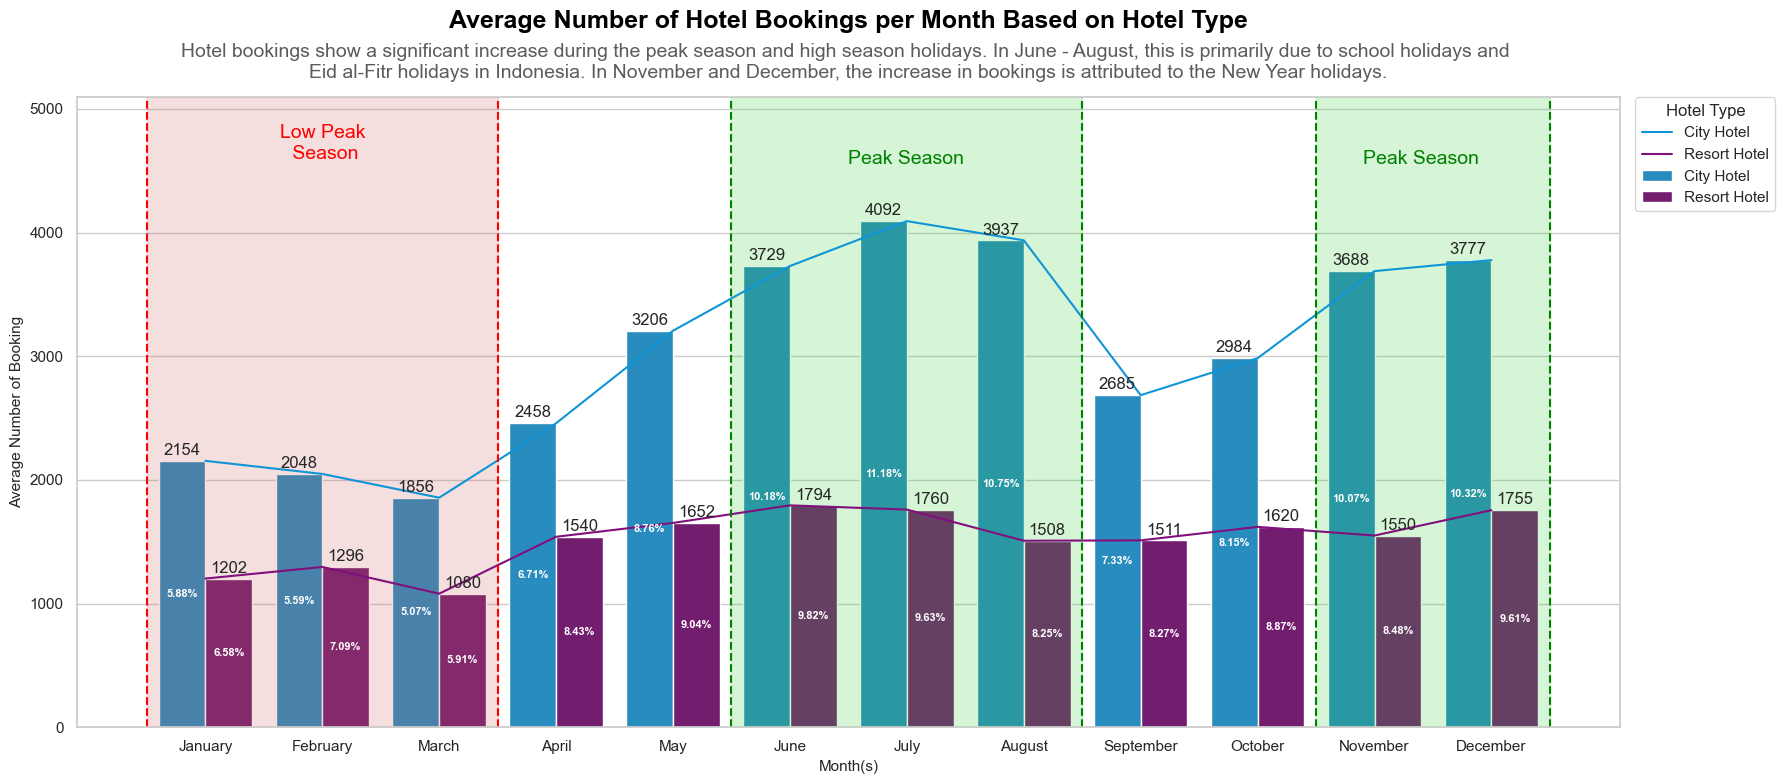

In [40]:
# Set figure & size
fig, ax = plt.subplots(figsize=(18, 8))

color = ['#0F95D7', '#810F7C']

# Create bar plot and line plot
sns.barplot(x='arrival_month', y ='avg_booking', 
            data=df_book, hue='hotel_type', palette=color)

sns.lineplot(x='arrival_month', y ='avg_booking', 
             data=df_book, hue='hotel_type', palette=color)


# Add labels to the bar plot
plt.bar_label(ax.containers[0], padding=2)
plt.bar_label(ax.containers[1], padding=2)

for i, val in enumerate(df_book["hotel_type"].unique()):
    labels = df_book[df_book["hotel_type"] == val]['percentage'].astype(str) + "%"
    plt.bar_label(ax.containers[i], labels,
              label_type='center', color='white', 
              weight='bold', fontsize=8)

    
# Create area plots for Peak Season and Low Peak Season
max_book = max(df_book['avg_booking'])

plt.axvline(-0.5, ls='--', color='red')
plt.axvline(2.5, ls='--', color='red')
plt.stackplot(np.arange(-0.5,3.5), max_book+1000, color='indianred', alpha=0.2)
plt.text(x=1, y=max_book+500, s='Low Peak\n Season', fontsize=14, color='red', ha='center')

plt.axvline(4.5, ls='--', color='green')
plt.axvline(7.5, ls='--', color='green')
plt.stackplot(np.arange(4.5,8.5), max_book+1000, color='limegreen', alpha=0.2)
plt.text(x=5.5, y=max_book+500, s='Peak Season', fontsize=14, color='green', va='center')

plt.axvline(9.5, ls='--', color='green')
plt.axvline(11.5, ls='--', color='green')
plt.stackplot(np.arange(9.5,12.5), max_book+1000, color='limegreen', alpha=0.2)
plt.text(x=9.9, y=max_book+500, s='Peak Season', fontsize=14, color='green', va='center')


# Set title, labels & legend
plt.title("Average Number of Hotel Bookings per Month Based on Hotel Type", 
          fontsize=18, color='black', weight='bold', pad=50)
plt.xlabel('Month(s)', fontsize=11)
plt.ylabel('Average Number of Booking', fontsize=11)
plt.legend(title="Hotel Type",
           bbox_to_anchor=(1.01, 1), 
           loc='upper left', 
           borderaxespad=0)

# Set additional information
x_start, x_end = ax.get_xlim()
y_start, y_end = ax.get_ylim()
desc = """Hotel bookings show a significant increase during the peak season and high season holidays. In June - August, this is primarily due to school holidays and 
Eid al-Fitr holidays in Indonesia. In November and December, the increase in bookings is attributed to the New Year holidays.
"""
ax.text((x_start+x_end)/2, y_end*0.95, desc,
        ha = 'center',fontsize = 14,  alpha = 0.75)


# Set axis limits
plt.ylim(0, max_book+1000)

# sns.despine() # to hide lines on the outside of the axis (top and right)
plt.tight_layout()

Interpretation:

- Both hotels experience a similar increasing trend in the average number of hotel bookings. However, the highest peak is observed in the City Hotel.

- Hotel bookings show a significant increase during the peak season and high season holidays. The high peak season occurs in June - August for both City and Resort Hotels, mainly due to school holidays and the extended Eid al-Fitr holidays in Indonesia.

- Additionally, there is another high peak season in November and December, but it has a shorter duration compared to the peak season in June and July, likely due to the New Year holidays and the end of annual leave allotments. To optimize hotel room bookings during the low peak season, the hotel can implement New Year's promotions to attract more visitors.

- The Low Peak Season occurs throughout January - March and also in August - September, particularly in the City Hotel, where a significant decrease in bookings is observed. This decrease can be attributed to the start of new school and office seasons, as students and workers are focused on their academic and professional activities. During the low season, the hotel can offer discounts or vouchers to entice customers to continue visiting the establishment.

## **📌 Impact Analysis of Stay Duration on Hotel Bookings Cancellation Rates**

In addition to analyzing customer behavior in booking hotels, the success of a hotel business can be measured by the booking cancellation rate. If many customers cancel their reservations, it can negatively impact the hotel's performance. Therefore, it is essential to explore the factors influencing booking cancellations. In this phase, we will investigate how the duration of stay can affect the hotel booking cancellation rate.

To analyze the correlation between the duration of stay and the hotel booking cancellation rate.

In [41]:
df_final.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guests,stay_duration,arrival_date_num_month
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,0,0,0,Personal,75,0,0,Check-Out,1,1,9
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304,0,0,Personal,75,0,0,Check-Out,1,1,9
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240,0,0,Personal,98,0,1,Check-Out,2,2,9
5,Resort Hotel,0,14,2017,September,27,1,0,2,2,0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240,0,0,Personal,98,0,1,Check-Out,2,2,9
6,Resort Hotel,0,0,2017,September,27,1,0,2,2,0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,0,No Deposit,0,0,0,Personal,107,0,0,Check-Out,2,2,9


1. Pay attention to the "stay duration" column, which is obtained by summing the weekdays and weekend nights. Next, we will examine the data distribution to simplify the grouping process accordingly.

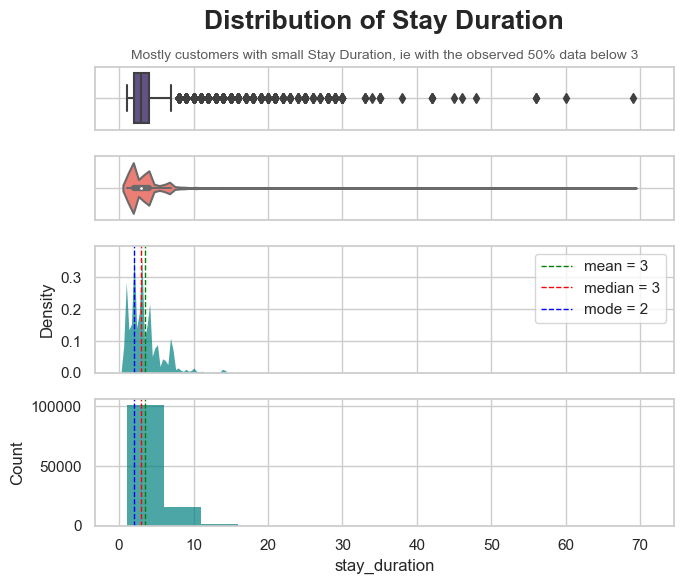

In [42]:
fig, ax = plt.subplots(nrows=4, ncols=1, 
                       figsize=(7, 6), sharex=True,
                       gridspec_kw={'height_ratios': [3,3,6, 6]})

total_charges = df_final["stay_duration"].dropna(axis=0) 

b = sns.boxplot(x=total_charges, ax=ax[0], color = "#5F4B8B")

v = sns.violinplot(x=total_charges, ax=ax[1], color="#FF6F61")

k = sns.kdeplot(x=total_charges, ax=ax[2], color='#008080', fill= True, 
                alpha=.7, linewidth=0)

h = sns.histplot(x=total_charges, ax=ax[3], binwidth=5, color='#008080', fill= True, 
                alpha=.7, linewidth=0)

mean = round(total_charges.mean(), 3)
median = total_charges.median()
mode = total_charges.mode()[0]

measurements = [mean, median, mode]
names = ["mean", "median", "mode"]
colors = ["green", "red", "blue"]

for measurement, name, color in zip(measurements, names, colors):
        k.axvline(x=measurement, linestyle="--", linewidth=1, label="{} = {:,.0f}".format(name, measurement), c=color)
        h.axvline(x=measurement, linestyle="--", linewidth=1, label="{} = {:,.0f}".format(name, measurement), c=color)
        
# adding horizontal grid lines and format label
for ax in [k, v, b]:
    ax.yaxis.grid(True)
    ax.set(xlabel=None)
    
b.set_title("Distribution of Stay Duration", 
          fontsize=19, fontweight='bold', pad=27)

# set info
x_start, x_end = b.get_xlim()
y_start, y_end = b.get_ylim()
desc = "Mostly customers with small Stay Duration, ie with the observed 50% data below 3"
b.text((x_start+x_end)/2, y_end*1.25, desc,
        ha = 'center',fontsize = 10,  alpha = 0.75)

k.set_xlabel("Stay Duration")
k.legend()
plt.tight_layout()
plt.show()

Based on the data distribution, it appears to be positively skewed or right-skewed. To facilitate data categorization, grouping will be applied. Data points greater than 21 will be combined into a single category.

2. Group the values of the new column obtained in the previous step to make it more significant, taking into account the data distribution for meaningful categorization.

In [43]:
# get stay duration group
def set_staydur_group(x):
    if x['stay_duration'] <= 7:
        return "<= 1 Week"
    elif x['stay_duration'] <= 14:
        return "2 Weeks"
    elif x['stay_duration'] <= 21:
        return "3 Weeks"
    return ">= 4 Weeks"

df_final["stay_duration_group"] = df_final.apply(lambda x: set_staydur_group(x), axis = 1)
df_final["stay_duration_group"].unique()

array(['<= 1 Week', '2 Weeks', '3 Weeks', '>= 4 Weeks'], dtype=object)

In [44]:
df_final['stay_duration_group'].value_counts()

<= 1 Week     113339
2 Weeks         4796
3 Weeks          274
>= 4 Weeks       155
Name: stay_duration_group, dtype: int64

3. Create an aggregate table that compares the number of canceled hotel bookings based on the duration of stay for each hotel type, focusing on the proportion of canceled bookings.

In [45]:
df_cancel = df_final.groupby(["hotel", "stay_duration_group", "is_canceled"]) \
                    .agg({"hotel":"count"}) \
                    .rename(columns={"hotel": "num_booking"}) \
                    .reset_index()

df_tot_cancel = df_cancel.groupby(["hotel", "stay_duration_group"]) \
                  .agg({"num_booking":"sum"}) \
                  .rename(columns={"num_booking": "total_booking"}) \
                  .reset_index()

df_cancel = df_cancel.merge(df_tot_cancel, on=["hotel", "stay_duration_group"])

df_cancel["cancellation_ratio"] = round((df_cancel["num_booking"]/df_cancel["total_booking"])*100, 2)

sorter = ["<= 1 Week", "2 Weeks", "3 Weeks", ">= 4 Weeks"]
df_cancel["stay_duration_group"] = pd.Categorical(df_cancel["stay_duration_group"], 
                                          categories=sorter, 
                                          ordered=True)

df_cancel.sort_values("stay_duration_group", inplace=True)
df_cancel.reset_index(drop=True, inplace=True)

df_cancel

,hotel,stay_duration_group,is_canceled,num_booking,total_booking,cancellation_ratio
0,City Hotel,<= 1 Week,0,45287,77678,58.300
1,City Hotel,<= 1 Week,1,32391,77678,41.700
2,Resort Hotel,<= 1 Week,0,25754,35661,72.220
3,Resort Hotel,<= 1 Week,1,9907,35661,27.780
4,City Hotel,2 Weeks,0,511,1069,47.800
5,City Hotel,2 Weeks,1,558,1069,52.200
6,Resort Hotel,2 Weeks,0,2649,3727,71.080
7,Resort Hotel,2 Weeks,1,1078,3727,28.920
8,City Hotel,3 Weeks,0,29,105,27.620
9,City Hotel,3 Weeks,1,76,105,72.380


We will be conducting an observation on data with canceled bookings, specifically focusing on the cancellation ratio for each hotel type. To do this, we will filter the data to include only records where 'is_canceled' equals 1.

In [46]:
#pick the data that hotels has been cancelled
df_cancel_final = df_cancel[df_cancel['is_canceled']==1]
df_cancel_final

,hotel,stay_duration_group,is_canceled,num_booking,total_booking,cancellation_ratio
1,City Hotel,<= 1 Week,1,32391,77678,41.700
3,Resort Hotel,<= 1 Week,1,9907,35661,27.780
5,City Hotel,2 Weeks,1,558,1069,52.200
7,Resort Hotel,2 Weeks,1,1078,3727,28.920
9,City Hotel,3 Weeks,1,76,105,72.380
11,Resort Hotel,3 Weeks,1,79,169,46.750
13,City Hotel,>= 4 Weeks,1,41,47,87.230
15,Resort Hotel,>= 4 Weeks,1,46,108,42.590


4. Create a bar plot to display the cancellation ratio of bookings based on the duration of stay for each hotel type, emphasizing the proportion of canceled bookings.

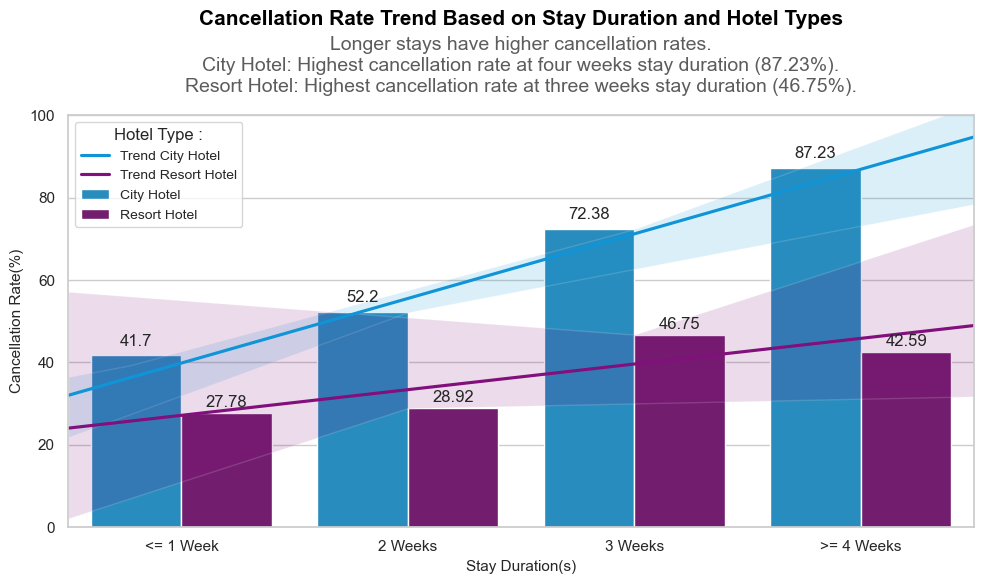

In [47]:
# Set figure & size
fig, ax = plt.subplots(figsize=(10, 6))

color = ['#0F95D7', '#810F7C']
city_hotel = df_cancel_final[df_cancel_final['hotel'] == 'City Hotel']
resort_hotel = df_cancel_final[df_cancel_final['hotel'] == 'Resort Hotel']

# Create bar plot and regression plot
sns.barplot(x='stay_duration_group', y='cancellation_ratio', 
            data=df_cancel_final, hue='hotel', palette=color)

sns.regplot(x=np.arange(0, len(city_hotel)), y='cancellation_ratio', 
            data=city_hotel, scatter=False, color=color[0],
            label = 'Trend City Hotel', truncate=False)

sns.regplot(x=np.arange(0, len(resort_hotel)), y='cancellation_ratio', 
            data=resort_hotel, scatter=False, color=color[1], 
            label='Trend Resort Hotel', truncate=False)

# Add labels to the bar plot
plt.bar_label(ax.containers[0], padding=5)
plt.bar_label(ax.containers[1], padding=2)

# Set title, labels & legend
plt.title("Cancellation Rate Trend Based on Stay Duration and Hotel Types", 
          fontsize=15, color='black', weight='bold', pad=65)
plt.xlabel('Stay Duration(s)', fontsize=11)
plt.ylabel('Cancellation Rate(%)', fontsize=11)

plt.legend(title='Hotel Type :', title_fontsize=12, prop={'size':10})


# Set additional information
x_start, x_end = ax.get_xlim()
y_start, y_end = ax.get_ylim()
desc = """Longer stays have higher cancellation rates.
City Hotel: Highest cancellation rate at four weeks stay duration (87.23%).
Resort Hotel: Highest cancellation rate at three weeks stay duration (46.75%)."""
ax.text((x_start+x_end)/2, y_end*0.98, desc,
        ha = 'center', fontsize = 14,  alpha = 0.75)

# Set axis limits
plt.ylim(0, 100)

# sns.despine() # # to hide lines on the outside of the axis (top and right)
plt.tight_layout()

Interpretation : 
- The City Hotel experiences the highest number of cancellations with a significant increasing trend, while the Resort Hotel also shows an increasing trend, but not as steady.

- There is a positive correlation between Stay Duration and Cancellation Ratio, indicating that the longer customers stay, both in City and Resort Hotels, the higher the cancellation rate.

- The City Hotel's highest cancellation rate is observed for stays above 4 weeks, whereas for the Resort Hotel, the highest cancellation rate occurs for stays of 3 weeks.

- To address this issue, the hotel company can pay closer attention to the causes of booking cancellations and implement stricter cancellation policies. Additionally, offering special promotions may be effective in mitigating cancellations.

## **📌 Impact Analysis of Lead Time on Hotel Bookings Cancellation Rate**

The objective of this business insight exploration is to analyze the correlation between the lead time for hotel bookings and the rate of hotel booking cancellations. In the hotel industry, customers are usually allowed to book hotels before their arrival dates, and the lead time can vary from a few days to several months. 

The task is to examine whether the lead time between the hotel booking and the arrival date influences the rate of hotel booking cancellations.

1. Create a new column that categorizes the booking lead time by creating intervals for the categorization.

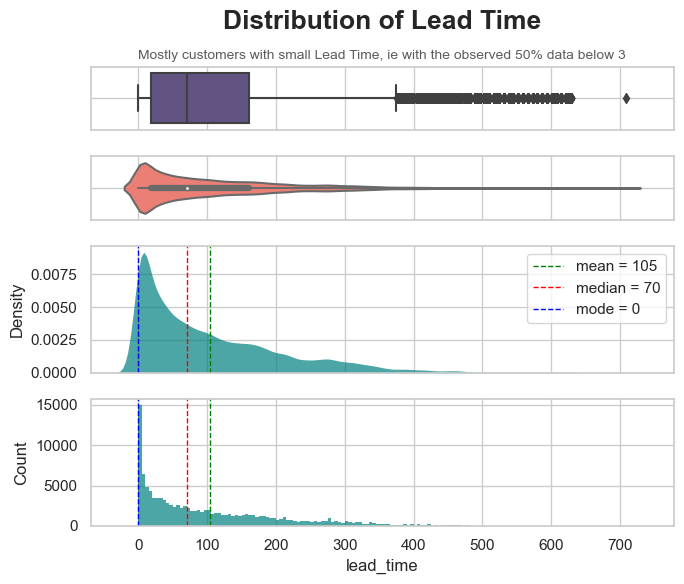

In [48]:
fig, ax = plt.subplots(nrows=4, ncols=1, 
                       figsize=(7, 6), sharex=True,
                       gridspec_kw={'height_ratios': [3,3,6, 6]})

total_charges = df_final["lead_time"].dropna(axis=0) 

b = sns.boxplot(x=total_charges, ax=ax[0], color = "#5F4B8B")

v = sns.violinplot(x=total_charges, ax=ax[1], color="#FF6F61")

k = sns.kdeplot(x=total_charges, ax=ax[2], color='#008080', fill= True, 
                alpha=.7, linewidth=0)

h = sns.histplot(x=total_charges, ax=ax[3], binwidth=5, color='#008080', fill= True, 
                alpha=.7, linewidth=0)

mean = round(total_charges.mean(), 3)
median = total_charges.median()
mode = total_charges.mode()[0]

measurements = [mean, median, mode]
names = ["mean", "median", "mode"]
colors = ["green", "red", "blue"]

for measurement, name, color in zip(measurements, names, colors):
        k.axvline(x=measurement, linestyle="--", linewidth=1, label="{} = {:,.0f}".format(name, measurement), c=color)
        h.axvline(x=measurement, linestyle="--", linewidth=1, label="{} = {:,.0f}".format(name, measurement), c=color)
        
# adding horizontal grid lines and format label
for ax in [k, v, b]:
    ax.yaxis.grid(True)
    ax.set(xlabel=None)
    
b.set_title("Distribution of Lead Time", 
          fontsize=19, fontweight='bold', pad=27)

# set info
x_start, x_end = b.get_xlim()
y_start, y_end = b.get_ylim()
desc = "Mostly customers with small Lead Time, ie with the observed 50% data below 3"
b.text((x_start+x_end)/2, y_end*1.25, desc,
        ha = 'center',fontsize = 10,  alpha = 0.75)

k.set_xlabel("Lead Time")
k.legend()
plt.tight_layout()
plt.show()

In [49]:
# get lead time group
def set_leadtime_group(x):
    if x['lead_time'] <= 30:
        return '<= 1 Month'
    elif x['lead_time'] <= 120:
        return '2 - 4 Months'
    elif x['lead_time'] <= 210:
        return '5 - 7 Months'
    elif x['lead_time'] <= 300:
        return '8 - 10 Months'
    elif x['lead_time'] <= 360:
        return '11 - 12 Months'
    return '> 12 Months'

df_final["lead_time_group"] = df_final.apply(lambda x: set_leadtime_group(x), axis = 1)
df_final["lead_time_group"].unique()

array(['<= 1 Month', '2 - 4 Months', '5 - 7 Months', '> 12 Months',
       '11 - 12 Months', '8 - 10 Months'], dtype=object)

In [50]:
df_final['lead_time_group'].value_counts()

2 - 4 Months      39851
<= 1 Month        38094
5 - 7 Months      21618
8 - 10 Months     11122
11 - 12 Months     4467
> 12 Months        3412
Name: lead_time_group, dtype: int64

2. Create an aggregated table comparing canceled hotel bookings based on the booking lead time for each hotel type, focusing on the proportion of canceled bookings.

In [51]:
df_cancel2 = df_final.groupby(["hotel", "lead_time_group", "is_canceled"]) \
                    .agg({"hotel":"count"}) \
                    .rename(columns={"hotel": "num_booking"}) \
                    .reset_index()

df_tot_cancel2 = df_cancel2.groupby(["hotel", "lead_time_group"]) \
                  .agg({"num_booking":"sum"}) \
                  .rename(columns={"num_booking": "total_booking"}) \
                  .reset_index()

df_cancel2 = df_cancel2.merge(df_tot_cancel2, on=["hotel", "lead_time_group"])

df_cancel2["cancellation_ratio"] = round((df_cancel2["num_booking"]/df_cancel2["total_booking"])*100, 2)

sorter = ['<= 1 Month', '2 - 4 Months', '5 - 7 Months', '8 - 10 Months', '11 - 12 Months', '> 12 Months']
df_cancel2["lead_time_group"] = pd.Categorical(df_cancel2["lead_time_group"], 
                                          categories=sorter, 
                                          ordered=True)

df_cancel2.sort_values("lead_time_group", inplace=True)
df_cancel2.reset_index(drop=True, inplace=True)

df_cancel2

,hotel,lead_time_group,is_canceled,num_booking,total_booking,cancellation_ratio
0,City Hotel,<= 1 Month,1,5174,23022,22.470
1,City Hotel,<= 1 Month,0,17848,23022,77.530
2,Resort Hotel,<= 1 Month,1,1976,15072,13.110
3,Resort Hotel,<= 1 Month,0,13096,15072,86.890
4,City Hotel,2 - 4 Months,0,16406,28189,58.200
5,City Hotel,2 - 4 Months,1,11783,28189,41.800
6,Resort Hotel,2 - 4 Months,1,3999,11662,34.290
7,Resort Hotel,2 - 4 Months,0,7663,11662,65.710
8,Resort Hotel,5 - 7 Months,1,2685,7269,36.940
9,City Hotel,5 - 7 Months,0,7298,14349,50.860


We will be conducting an observation on data with canceled bookings, specifically focusing on the cancellation ratio for each hotel type. To do this, we will filter the data to include only records where 'is_canceled' equals 1.

In [52]:
df_cancel_final2 = df_cancel2[df_cancel2['is_canceled']==1]
df_cancel_final2

,hotel,lead_time_group,is_canceled,num_booking,total_booking,cancellation_ratio
0,City Hotel,<= 1 Month,1,5174,23022,22.470
2,Resort Hotel,<= 1 Month,1,1976,15072,13.110
5,City Hotel,2 - 4 Months,1,11783,28189,41.800
6,Resort Hotel,2 - 4 Months,1,3999,11662,34.290
8,Resort Hotel,5 - 7 Months,1,2685,7269,36.940
10,City Hotel,5 - 7 Months,1,7051,14349,49.140
12,Resort Hotel,8 - 10 Months,1,1723,3986,43.230
14,City Hotel,8 - 10 Months,1,4376,7136,61.320
16,Resort Hotel,11 - 12 Months,1,513,1128,45.480
17,City Hotel,11 - 12 Months,1,2608,3339,78.110


3. Create a plot illustrating the cancellation ratio of bookings based on the booking lead time for each hotel type, using an appropriate plot type.

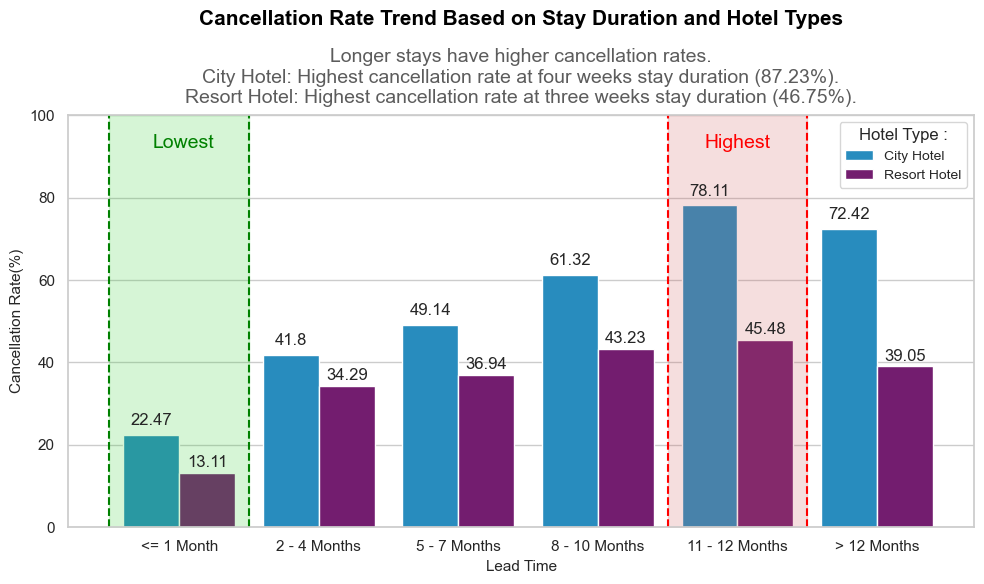

In [53]:
# Set figure & size
fig, ax = plt.subplots(figsize=(10, 6))

color = ['#0F95D7', '#810F7C']
sorter = ['<= 1 Month', '2 - 4 Months', '5 - 7 Months', '8 - 10 Months', '11 - 12 Months', '> 12 Months']
city_hotel = df_cancel_final2[df_cancel_final2['hotel'] == 'City Hotel']
resort_hotel = df_cancel_final2[df_cancel_final2['hotel'] == 'Resort Hotel']

# Create bar plot and line plot
sns.barplot(x='lead_time_group', y='cancellation_ratio', 
            data=df_cancel_final2, hue='hotel', palette=color,
            order=sorter)

# Add labels to the bar plot
plt.bar_label(ax.containers[0], padding=5)
plt.bar_label(ax.containers[1], padding=2)


# Create area plots for Peak Season and Low Peak Season
plt.axvline(-0.5, ls='--', color='green')
plt.axvline(0.5, ls='--', color='green')
plt.stackplot(np.arange(-0.5,1.5), 100, color='limegreen', alpha=0.2)
plt.text(x=0.03, y=92, s='Lowest', fontsize=14, color='green', ha='center')

plt.axvline(3.5, ls='--', color='red')
plt.axvline(4.5, ls='--', color='red')
plt.stackplot(np.arange(3.5,5.5), 100, color='indianred', alpha=0.2)
plt.text(x=4, y=92, s='Highest', fontsize=14, color='red', ha='center')


# Set title, labels & legend
plt.title("Cancellation Rate Trend Based on Stay Duration and Hotel Types", 
          fontsize=15, color='black', weight='bold', pad=65)
plt.xlabel('Lead Time', fontsize=11)
plt.ylabel('Cancellation Rate(%)', fontsize=11)

plt.legend(title='Hotel Type :', title_fontsize=12, prop={'size':10})


# Set additional information
x_start, x_end = ax.get_xlim()
y_start, y_end = ax.get_ylim()
desc = """Longer stays have higher cancellation rates.
City Hotel: Highest cancellation rate at four weeks stay duration (87.23%).
Resort Hotel: Highest cancellation rate at three weeks stay duration (46.75%)."""
ax.text((x_start+x_end)/2, y_end*0.98, desc,
        ha = 'center', fontsize = 14,  alpha = 0.75)

# Set axis limits
plt.ylim(0, 100)

# sns.despine() # # to hide lines on the outside of the axis (top and right)
plt.tight_layout()

Interpretation :

- In general, the longer the lead time, the higher the probability of order cancellation. Lead time refers to the number of days between the booking entry into the Property Management System (PMS) and the arrival date, where longer lead times are associated with higher cancellation rates.

- Both hotel types have the lowest cancellation rate for lead times of <= 1 month, with City Hotel at 22.47% and Resort Hotel at 13.11%.

- Both hotel types have the highest cancellation rate for bookings made with 11-12 months lead time, with City Hotel at 77.41% and Resort Hotel at 43.5%.

- Both Resort and City Hotels experience the highest cancellation rate around a 1-year lead time. This could be due to customers' vacation plans getting canceled or forgetting about their hotel reservation if the lead time is too long. Hotels can provide reminders to customers to reduce cancellations and implement a strict cancellation policy for every reservation to prevent such occurrences.

## **✨ Summary**

- Both hotels show a similar increasing trend in bookings, with the City Hotel experiencing the highest peak. Hotel bookings significantly increase during peak and high season holidays, particularly in June - August and November - December. The City Hotel also observes a significant decline in bookings during January - March and August - September. To optimize bookings during low peak seasons, implementing promotions and discounts can be effective strategies for both hotels.

- City Hotel has the highest cancellations with a significant increasing trend. There is a positive correlation between Stay Duration and Cancellation Ratio for both hotels. The City Hotel's highest cancellation rate is for stays above 4 weeks, while the Resort Hotel's highest rate is for stays of 3 weeks. Implementing stricter cancellation policies and offering special promotions can help mitigate cancellations.

- Longer lead times are associated with higher cancellation rates for both City and Resort Hotels. The lowest cancellation rates are observed for lead times of <= 1 month, while the highest rates occur for lead times of 11-12 months. Both Resort and City Hotels experience the highest cancellation rate around a 1-year lead time. Implementing reminders and strict cancellation policies can help reduce cancellations and improve overall booking efficiency.